### Final Project GEOS 505: Thomas Robbins
##### The single most used material for construction of civil infrastructure is reinforced concrete. The versatility and use of this material ranges from simple applications such as sidewalks, to highly complex applications such as dams and high-rise buildings. To ensure that the concrete is being designed to required specifications, several intermediate controls are used to verify and test quality assurance and quality control (QA/QC). The first method to implement QA/QC is the engineered mix design. The second method is in place testing. Testing is performed through several methods which include slump test, entrained air test, and compressive strength testing. Testing is used to ensure development of proper strength properties for each application. For the purpose of this project I intend to collect test results data from a federal agency, then identify the statistical variance between the design parameters and the final design strength given in the data. Considering the variability of mix designs, placement methods and environmental factors, test results should show similar variability. Given the importance of the strength parameters the concrete should not vary less than the given design. From basic statistical analysis, I should be able to produce a graph that identifies the strength parameters of the mix, and correlate the results with the input variables such as outside air temperature, slump test results, entrained air and unit weight of the concrete. If properly assessed, the potential of this work could make reasonable predictions of mix design strength parameters, given variation of input values. Further, Monte Carlo simulation will be performed on given data and a probability density function of the results will then be used assess at what confidence a prediction can be made. Results and analysis methods are subject to change given the complexity and availability of selected data.

##### The first step was to import the required libraries to read the input file 

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

#### Next step was to use pandas to read the csv file. In order to properly read some of the values, I had to truncate the values in certain cells. This was due to the file containing a degree symbol and unit written with each temperature value. 

In [2]:
data = pd.read_csv('Mix_Design_V2.0.csv',converters={"Air_Temp": lambda x: x[:2],"Concrete_Temp": lambda x: x[:2]})
data[0:4]

,PlacementDate,QA_QC,Report #,TicketNum,TestNum,Cyl_ID,Location,Neat_line_Vc,Actual_Vc,Waste_Vc,...,Early,Perc_Design,sevenDay,Perc_Design_seven,tenDay,perc_Design_ten,twoeight_Day,Perc_DesignTwoEight,fiveSix_Day,perc_Design_fivesix
0,43234,QC,NaN,15812,1,NaN,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43234,QC,NaN,15812,2,1,"RB 16, 17",NaN,NaN,NaN,...,2040.0,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43234,QC,NaN,15812,2,2,"RB 16, 17",NaN,NaN,NaN,...,2140.0,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43234,QC,NaN,15812,2,3,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,2950.0,0.66,NaN,NaN,NaN,NaN,NaN,NaN


#### From the displayed table in the previous line, the cells that do not contain values are represented as NaN. Also, the temperature values are being read as characters and not numeric values. The following code is an attempt to correct these issues. 

In [3]:
AirTemp = data['Air_Temp'].values
AirTemp = pd.to_numeric(AirTemp)
AirTemp[0:5]

array([nan, 79., 79., 79., 79.])

In [4]:
ConTemp = data['Concrete_Temp'].values
ConTemp = pd.to_numeric(ConTemp)
ConTemp[0:5]

array([73., 69., 69., 69., 69.])

##### Next I needed to insert the new numeric temperature values to the entire data set.

In [5]:
data['Air_Temp'] = AirTemp
data['Concrete_Temp'] = ConTemp

##### After all the values were properly identified as numeric, I inserted zeros everywhere a 'NaN' value was reported. 

In [6]:
Data = data.fillna(0)
Data = data
airtemp = Data['Air_Temp'].values
Data[0:4]

,PlacementDate,QA_QC,Report #,TicketNum,TestNum,Cyl_ID,Location,Neat_line_Vc,Actual_Vc,Waste_Vc,...,Early,Perc_Design,sevenDay,Perc_Design_seven,tenDay,perc_Design_ten,twoeight_Day,Perc_DesignTwoEight,fiveSix_Day,perc_Design_fivesix
0,43234,QC,NaN,15812,1,NaN,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43234,QC,NaN,15812,2,1,"RB 16, 17",NaN,NaN,NaN,...,2040.0,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43234,QC,NaN,15812,2,2,"RB 16, 17",NaN,NaN,NaN,...,2140.0,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43234,QC,NaN,15812,2,3,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,2950.0,0.66,NaN,NaN,NaN,NaN,NaN,NaN


##### Next, I wanted to see what the data looked like without NaN values. This posed a problem as some of the values were reporting zeros, which skewed the statistics performed later. 

In [7]:
print(Data.describe())

       PlacementDate      TicketNum     TestNum  Neat_line_Vc  Actual_Vc  \
count     898.000000     898.000000  898.000000  1.900000e+01       19.0   
mean    42975.458797   14730.514477    1.758352  3.037000e+01       38.0   
std        94.074113   13934.329070    0.699229  3.650066e-15        0.0   
min     42880.000000   10912.000000    1.000000  3.037000e+01       38.0   
25%     42941.250000   11757.000000    1.000000  3.037000e+01       38.0   
50%     42955.000000   12234.000000    2.000000  3.037000e+01       38.0   
75%     42964.000000   12617.000000    2.000000  3.037000e+01       38.0   
max     43326.000000  157193.000000    4.000000  3.037000e+01       38.0   

       Waste_Vc   Design_PSI    slump_in    Perc_Air    Air_Temp  \
count       0.0   898.000000  883.000000  883.000000  878.000000   
mean        NaN  4436.530067    6.942809    0.059929   71.349658   
std         NaN   302.133779    1.686023    0.016350   11.361363   
min         NaN  3000.000000    2.000000   

##### Next, I verified that the csv file was formatted to well enough to perform statistical operations. Noting there are several columns in the file that are not required for computations, I created new data frames. One for the input variables, one for the output strength, and another that had both. 

In [8]:
Data_vars = Data[['slump_in','Perc_Air','Air_Temp','Concrete_Temp']]
Data_strength = Data[['Design_PSI','sevenDay','tenDay','twoeight_Day','fiveSix_Day']]
DataTrunc = Data[['slump_in','Perc_Air','Air_Temp','Concrete_Temp','Design_PSI','sevenDay','tenDay','twoeight_Day']]
DataTrunc = DataTrunc.fillna(3000)

##### After setting the new data frame to have only the specific variables that I required, I attempted to plot a graphical representation on the basic statistical parameters for each variable. Note here that there is a clear issue with the results, as the zeros that I previously inserted into the csv file have skewed the data so that the mean and standard deviations are incorrect. 

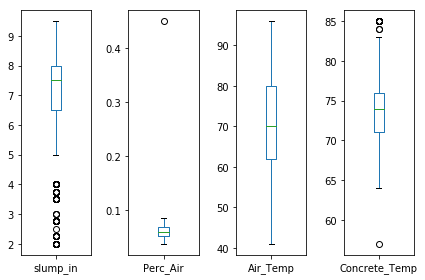

In [9]:
Data_vars.plot(kind='box', subplots=True)
plt.tight_layout()

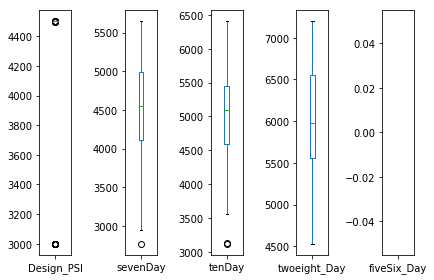

In [10]:
Data_strength.plot(kind='box', subplots=True)
plt.tight_layout()

#### To correct the issue of the zeros skewing the results, I needed to select the particular rows that contained actual results data. This was cumbersome as the each column has zeros, and the actual result values are offset in the csv file. This means that I could not just run one line of code to eliminate rows with zeros, as all rows would be neglected. I had to select rows based on which column value I wanted, then use these as new indexed data frames to run statistical parameters on. 

In [11]:
slump = Data.loc[Data['slump_in'] !=0]
percAir = Data.loc[Data['Perc_Air'] !=0]
tempAir = Data.loc[Data['Air_Temp'] !=0]
tempCon = Data.loc[Data['Concrete_Temp'] !=0]

In [12]:
early = Data.loc[Data['Early'] != 0]  
day7 = Data.loc[Data['sevenDay'] != 0]
day10 = Data.loc[Data['tenDay'] != 0]
day28 = Data.loc[Data['twoeight_Day'] != 0]
day56 = Data.loc[Data['fiveSix_Day'] != 0]

##### Now that the values are neglecting the many zeros within the data frame, I can print new box plots. 

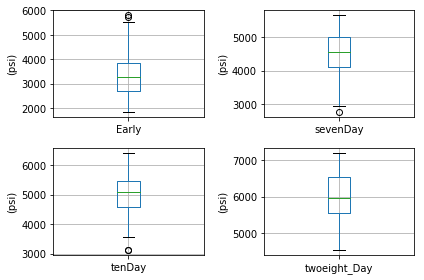

In [13]:
fig = plt.figure()

plt.subplot(2, 2, 2)
plt.ylabel('(psi)')
day7.boxplot(column='sevenDay')

plt.subplot(2, 2, 3)
plt.ylabel('(psi)')
day10.boxplot(column='tenDay')

plt.subplot(2, 2, 4)
plt.ylabel('(psi)')
day28.boxplot(column='twoeight_Day')

plt.subplot(2, 2, 1)
plt.ylabel('(psi)')
early.boxplot(column='Early')

plt.tight_layout()

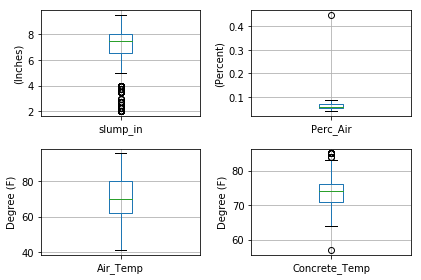

In [14]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.ylabel('(Inches)')
slump.boxplot(column='slump_in')

plt.subplot(2, 2, 2)
plt.ylabel('(Percent)')
percAir.boxplot(column='Perc_Air')

plt.subplot(2, 2, 3)
plt.ylabel('Degree (F)')
tempAir.boxplot(column='Air_Temp')

plt.subplot(2, 2, 4)
plt.ylabel('Degree (F)')
tempCon.boxplot(column='Concrete_Temp')

plt.tight_layout()

In [15]:
print('7-day_max =',day7['sevenDay'].max());
print('7-day_min =',day7['sevenDay'].min());
print('7-day_StdDev=',day7['sevenDay'].std())

('7-day_max =', 5650.0)
('7-day_min =', 2770.0)
('7-day_StdDev=', 598.9919447187094)


##### Now that the variables are able to be used to compute the required statistics, a new issue arises. In order to bring everything into one input variable, I will have to append all the new, zero-absent, data frames into one unified index. This will cause problems as all the zeros will be reinserted. Currently, I use "DataTrunc" as the input index, and that has zeros. Which produces very boxy boxes. 

In [16]:
# This section of code is used to import additional libraries
import scipy
import sklearn

In [17]:
# This code loads additional regression libraries
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils

In [18]:
# Split-out validation dataset 
array = DataTrunc.values
X = array[:,0:4]  # cannot change these values because it says beyond the bounds. 
Y = array[:,4]  # dido
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#### This next code runs regression models on the csv file. Here I was able to output accuracy and model fit

In [20]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.972164 (0.013870)
LDA: 0.972164 (0.013870)
KNN: 0.983314 (0.021334)
CART: 0.984722 (0.018056)
NB: 0.948513 (0.019616)
SVM: 0.980516 (0.009190)


#### Next, I show a graphical representation of the best fitting model. From this it appears that KNN and SVM are the two best. 

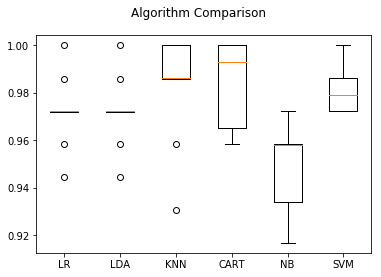

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Here I attempted to run simulations indipendently between KNN and then SVM. The output shows that the SVM method is better than KNN. 

In [22]:
# Make predictions on validation dataset 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

In [23]:
print(accuracy_score(Y_validation, predictions))

0.9555555555555556


In [24]:
print(confusion_matrix(Y_validation, predictions))

[[  5   0   3   0]
 [  0   0   1   0]
 [  3   0 167   0]
 [  0   0   1   0]]


In [25]:
print(classification_report(Y_validation, predictions))

             precision    recall  f1-score   support

     3000.0       0.62      0.62      0.62         8
     4499.0       0.00      0.00      0.00         1
     4500.0       0.97      0.98      0.98       170
     4503.0       0.00      0.00      0.00         1

avg / total       0.94      0.96      0.95       180



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
# similar as above code but with SVM
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

In [55]:
print(accuracy_score(Y_validation, predictions))

0.9833333333333333


In [56]:
print(confusion_matrix(Y_validation, predictions))

[[  8   0   0   0]
 [  0   0   1   0]
 [  1   0 169   0]
 [  0   0   1   0]]


In [57]:
print(classification_report(Y_validation, predictions))

             precision    recall  f1-score   support

     3000.0       0.89      1.00      0.94         8
     4499.0       0.00      0.00      0.00         1
     4500.0       0.99      0.99      0.99       170
     4503.0       0.00      0.00      0.00         1

avg / total       0.97      0.98      0.98       180



#### Here I attempted to change the data file to only contain the variables that I required for strength testing. This effectivly was not productive, and produced errors in regression modeling. The intent was to create code to perform Monte Carlo simulation, however, the code would not run properly and the results were not realistic. The final analysis is written at the end of this notebook. 

In [26]:
Data_Var = [slump,percAir,tempAir,tempCon]
# print(Data_Var)

In [27]:
#List unique values in the df['name'] column
UniqData = data.PlacementDate.unique() # lower case data to keep the nan's
locate = data.PlacementDate.iloc() 

In [28]:
print(UniqData)

[43234 43241 43244 43258 43279 43301 43326 42880 42886 42892 42894 42908
 42909 42912 42914 42915 42921 42922 42933 42935 42936 42937 42940 42941
 42942 42943 42944 42947 42948 42949 42950 42951 42954 42955 42956 42957
 42958 42961 42962 42963 42964 42965 42968 42969 42970 42971]


In [29]:
data.PlacementDate.iloc()

In [31]:
Earlymeans = data.groupby('PlacementDate')['Early'].mean()
Slumpmeans = data.groupby('PlacementDate')['slump_in'].mean()
PerAirmeans = data.groupby('PlacementDate')['Perc_Air'].mean()
AirTempmean = data.groupby('PlacementDate')['Air_Temp'].mean()
ConTempmean = data.groupby('PlacementDate')['Concrete_Temp'].mean()
Sevenmean = data.groupby('PlacementDate')['sevenDay'].mean()
Tenmean = data.groupby('PlacementDate')['tenDay'].mean()
Twomean = data.groupby('PlacementDate')['twoeight_Day'].mean()

In [32]:
print(UniqData.shape)
print(Earlymeans.shape)
print(PerAirmeans.shape)

(46L,)
(46L,)
(46L,)


In [33]:
frames = [Slumpmeans, PerAirmeans, AirTempmean, ConTempmean, Earlymeans, Sevenmean, Tenmean, Twomean]

MeanVals = pd.concat(frames, axis=1, sort=True)

print(MeanVals[0:5])

               slump_in  Perc_Air   Air_Temp  Concrete_Temp        Early  \
PlacementDate                                                              
42880          2.250000  0.060000  52.000000      66.000000          NaN   
42886          3.750000  0.060000  58.000000      68.000000          NaN   
42892          4.000000  0.070500  61.500000      70.500000          NaN   
42894          4.000000  0.064000  56.000000      68.000000          NaN   
42908          6.038462  0.054231  72.307692      75.153846  3446.666667   

               sevenDay  tenDay  twoeight_Day  
PlacementDate                                  
42880            4030.0  4575.0   5650.000000  
42886            4430.0  4685.0   5990.000000  
42892            3960.0  4545.0   5500.000000  
42894            4317.5  5150.0   6218.333333  
42908            4560.0  4675.0   6085.000000  


In [34]:
MeanVals.sevenDay.min()

2860.0

In [35]:
MeanVals.Early.min()

1910.0

In [36]:
MeanVals = MeanVals.fillna(1910)

In [37]:
MeanVals.twoeight_Day.min()

1910.0

In [40]:
print(MeanVals[0:5])

               slump_in  Perc_Air   Air_Temp  Concrete_Temp        Early  \
PlacementDate                                                              
42880          2.250000  0.060000  52.000000      66.000000  1910.000000   
42886          3.750000  0.060000  58.000000      68.000000  1910.000000   
42892          4.000000  0.070500  61.500000      70.500000  1910.000000   
42894          4.000000  0.064000  56.000000      68.000000  1910.000000   
42908          6.038462  0.054231  72.307692      75.153846  3446.666667   

               sevenDay  tenDay  twoeight_Day  
PlacementDate                                  
42880            4030.0  4575.0   5650.000000  
42886            4430.0  4685.0   5990.000000  
42892            3960.0  4545.0   5500.000000  
42894            4317.5  5150.0   6218.333333  
42908            4560.0  4675.0   6085.000000  


In [52]:
MinEarly = MeanVals.Early.min()
MaxEarly = MeanVals.Early.max()

5686.666666666667

### Analysis of Notebook
#### This final project was intended to produce a code that could predict the final strength of concrete given varience of input parameters. The code was able to produce a regression methods with a maximum accuracy of fit of 98%. This fit was then used to run a prediction analysis, and was able to accuratly predict the majority of the testing results. With this information, it is clear that the machine learing was performed accuratly, however, the results only produced concrete strengths well above failure. This is cause for speculation as the input variables may in fact cause strength to fall well below allowable minimums. Further testing on the data set could prduce random same simulations that would give a probability density function. This would require significant work on my part, as the code generated in the last cells would not work properly. 